
### 금리_단기1년전차이

```
'번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', 'target',
       '금리_단기1년전차이', '평수', '동', '아파트ID', '아파트ID거리', '가까운공원ID', 'is_test',
       '학군'
       
28513
```

In [33]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from backup.module.preprocess import drop_columns

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'AppleGothic'}) # 폰트 설정
plt.rc('font', family='AppleGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import lightgbm as lgb
import eli5
from eli5.sklearn import PermutationImportance

In [34]:
# sys.path를 수정하여 모듈 경로를 설정
import sys
import os
import pandas as pd

# 프로젝트 루트 경로 추가
project_root = os.path.abspath("..")
sys.path.append(project_root)
# 모든 컬럼 출력 설정
# pd.set_option('display.max_columns', None)
# 모든 행 출력 설정
# pd.set_option('display.max_rows', None)

import module

In [35]:
df, df_test_y = module.file_load.load_current_version()

In [36]:
df['is_test'].value_counts()      # train과 test data가 하나로 합쳐진 것을 확인할 수 있습니다.

is_test
0    1097155
1       5607
Name: count, dtype: int64

In [37]:
df.columns

Index(['index', '시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층',
       '건축년도', '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)',
       'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)',
       'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적',
       'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
       'k-135㎡초과', 'k-홈페이지', 'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일',
       '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', '금리_단기1년전차이',
       'nearest_subway_distance', 'nearest_bus_distance', '1차역세권', '2차역세권',
       '1차버스정류장', '경과연도', '경과구분', '평수', '층_그룹', '평수_그룹', '시', '구', '동',
       '아파트ID', '아파트ID거리', 'nearest_park_distance', '가까운공원이름', '가까운공원ID',
       '공원갯수', '공원총면적', '공원생활권점수', '산책로갯수', '산책로총길이', '산책생활권점수', '생태문화길갯수',
       '생태문화길총길이', '생태문화생활권점수', '한강지천길갯수', '한강지

In [38]:
# 결측치가 많거나 필요 없는 컬럼을 정리한다
drop_columns = [
    'index', '시군구',  '본번', '부번', 
      '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)',
       'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)',
       'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적',
       'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
       'k-135㎡초과', 'k-홈페이지', 'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일',
    
       '사용허가여부', '관리비 업로드','단지신청일', 
       'nearest_subway_distance', 'nearest_bus_distance', '1차역세권', '2차역세권',
       '1차버스정류장', '경과연도', '경과구분',  '층_그룹', '평수_그룹', '시',
        'nearest_park_distance',
    '가까운공원이름', 
        '공원생활권점수',
        '산책로갯수',
        '산책로총길이',
        '산책생활권점수',
        '생태문화길갯수',
        '생태문화길총길이',
        '생태문화생활권점수',
        '한강지천길갯수',
        '한강지천길총길이',
        '숲세권종합점수',
        '숲세권등급',
        '한강거리',
        '지가지수',
        '아파트전세_전기대비증감률',
        '실업률',
        '민간소비',
        '소비자심리지수',
        '경제심리지수',
        '여수신 금리차',
        '계약일',
        '전용면적(㎡)',
        '공원갯수',
        '공원총면적',
        '한강지천생활권점수'
]

# 전처리

In [39]:
df_select = module.preprocess.drop_columns(df, drop_columns)

In [40]:
module.preprocess.번지_본번_부번_결측채우기(df_select)
module.preprocess.한강거리_add(df_select)

In [41]:
df_select.columns

Index(['번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', 'target',
       '금리_단기1년전차이', '평수', '구', '동', '아파트ID', '아파트ID거리', '가까운공원ID', 'is_test',
       '한강거리'],
      dtype='object')

# 파생변수

In [42]:
gangnam_8_schools = ['강남구', '서초구', '송파구']
df_select['학군'] = df_select['구'].apply(lambda x: 1 if x in gangnam_8_schools else 0)

In [43]:
final_drop_columns = ['구']
df_select.drop(final_drop_columns, axis=1, inplace=True)

# Model Training

## 범주형 변수 Encoding

In [44]:
model_data = df_select.copy()

In [45]:
model_data.columns

Index(['번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', 'target',
       '금리_단기1년전차이', '평수', '동', '아파트ID', '아파트ID거리', '가까운공원ID', 'is_test',
       '한강거리', '학군'],
      dtype='object')

In [46]:
dt_train, dt_test = module.preprocess.split_train_test(model_data)
categorical_columns_v2 = module.preprocess.범주형_filter(dt_train)
label_encoders = module.preprocess.범주형_encoding(dt_train, dt_test, categorical_columns_v2)
print(dt_train.shape, dt_test.shape)

100%|██████████| 6/6 [00:01<00:00,  4.76it/s]

(1097155, 17) (5607, 17)


## Model Training


# 훈련데이터 분할

In [47]:
X_train, X_val, y_train, y_val = module.preprocess.holdout_split_X_y(dt_train)

In [48]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((877724, 16), (219431, 16), (877724,), (219431,))

In [49]:
X_train.head(1)

,번지,아파트명,계약년월,층,건축년도,도로명,좌표X,좌표Y,금리_단기1년전차이,평수,동,아파트ID,아파트ID거리,가까운공원ID,한강거리,학군
586784,1444,3131,201605,11,1988,4922,127.015602,37.498732,-0.25,24,151,1404,18.501546,1612,1900.611918,1


In [50]:
X_test = dt_test.drop(['target'], axis=1)

# LGBMRegressor 모델 선언 시 파라미터 추가
lgbr = lgb.LGBMRegressor(
    boosting_type='dart',  # 부스팅 타입 (기본값: 'gbdt')
    num_leaves=258,         # 리프 노드의 최대 개수 (기본값: 31)
    max_depth=8,          # 트리의 최대 깊이 (-1은 제한 없음)
    learning_rate=0.07224290084064122,     # 학습률 (기본값: 0.1)
    n_estimators=301,      # 부스팅 반복 횟수 (기본값: 100)
    min_child_samples=5,  # 자식 노드를 분할하기 위한 최소 데이터 수 (기본값: 20)
    subsample=0.9773487107075421,         # 데이터 샘플링 비율 (기본값: 1.0)
    colsample_bytree=0.9011817947068029,  # 트리 생성 시 feature 샘플링 비율 (기본값: 1.0)
    reg_alpha=0.04063525938772354,
    reg_lambda=0.0014482851327836004,
    random_state=42        # 랜덤 시드
)

# 모델 학습
lgbr.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2914
[LightGBM] [Info] Number of data points in the train set: 877724, number of used features: 16
[LightGBM] [Info] Start training from score 57146.085207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMRegressor(boosting_type='dart', colsample_bytree=0.9011817947068029,
              learning_rate=0.07224290084064122, max_depth=8,
              min_child_samples=5, n_estimators=301, num_leaves=258,
              random_state=42, reg_alpha=0.04063525938772354,
              reg_lambda=0.0014482851327836004, subsample=0.9773487107075421)

In [51]:
model = lgbr

In [52]:
# 검증 데이터로 예측
real_test_pred = lgbr.predict(X_test)
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(df_test_y, real_test_pred))}')
# s : RMSE test: 22522.447464776706
# 기존 한강거리 : 22000 , 22055

RMSE test: 22055.819746578665


In [53]:
X_test.shape, real_test_pred.shape, df_test_y.shape

((5607, 16), (5607,), (5607, 1))

In [54]:
# Squared_error를 계산하는 함수를 정의하겠습니다.
def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

In [55]:
X_val = X_test.reset_index(drop=True)
X_val

,번지,아파트명,계약년월,층,건축년도,도로명,좌표X,좌표Y,금리_단기1년전차이,평수,동,아파트ID,아파트ID거리,가까운공원ID,한강거리,학군
0,1678,327,202301,10,1983,4465,127.068028,37.487802,2.25,22,8,1200,0.000000,1661,3113.804133,1
1,1665,328,202212,3,1983,471,127.072682,37.489122,2.25,25,8,1199,45.380282,1731,2867.571730,1
2,1665,328,202301,10,1983,471,127.072682,37.489122,2.50,25,8,1199,45.380282,1731,2867.571730,1
3,728,1933,202210,7,2019,4978,127.064151,37.480049,1.75,18,8,250,117.916314,1691,3968.559871,1
4,728,1933,202212,8,2019,4978,127.064151,37.480049,2.25,25,8,250,117.916314,1691,3968.559871,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5602,3322,36,202207,4,2021,5352,126.891951,37.584794,1.25,25,163,181,0.000000,747,2881.698680,0
5603,3322,36,202207,6,2021,5352,126.891951,37.584794,1.25,25,163,181,0.000000,747,2881.698680,0
5604,3322,36,202207,7,2021,5352,126.891951,37.584794,1.25,25,163,181,0.000000,747,2881.698680,0
5605,3322,36,202209,4,2021,5352,126.891951,37.584794,1.75,25,163,181,0.000000,747,2881.698680,0


In [56]:
X_val['target'] = df_test_y
X_val['pred'] = real_test_pred
X_val['예측차이'] = X_val['target'] - X_val['pred']
# RMSE 계산
squared_errors = calculate_se(X_val['target'], X_val['pred'])
X_val['error'] = squared_errors
# Error가 큰 순서대로 sorting 해 보겠습니다.
X_val_sort = X_val.sort_values(by='error', ascending=False)       # 내림차순 sorting

In [57]:
X_val_sort_top100 = X_val.sort_values(by='error', ascending=False).head(100)        # 예측을 잘 하지못한 top 100개의 data
X_val_sort_tail100 = X_val.sort_values(by='error', ascending=False).tail(100)       # 예측을 잘한 top 100개의 data

In [58]:
# 해석을 위해 레이블인코딩 된 변수를 복원해줍니다.
error_top100 = X_val_sort_top100.copy()
for column in categorical_columns_v2 :     # 앞서 레이블 인코딩에서 정의했던 categorical_columns_v2 범주형 변수 리스트를 사용합니다.
    error_top100[column] = label_encoders[column].inverse_transform(X_val_sort_top100[column])

best_top100 = X_val_sort_tail100.copy()
for column in categorical_columns_v2 :     # 앞서 레이블 인코딩에서 정의했던 categorical_columns_v2 범주형 변수 리스트를 사용합니다.
    best_top100[column] = label_encoders[column].inverse_transform(X_val_sort_tail100[column])

In [59]:
error_top100.to_csv('7_한강_lgbm_error.csv', index=False)
best_top100.to_csv('7_한강_lgbm_top.csv', index=False)

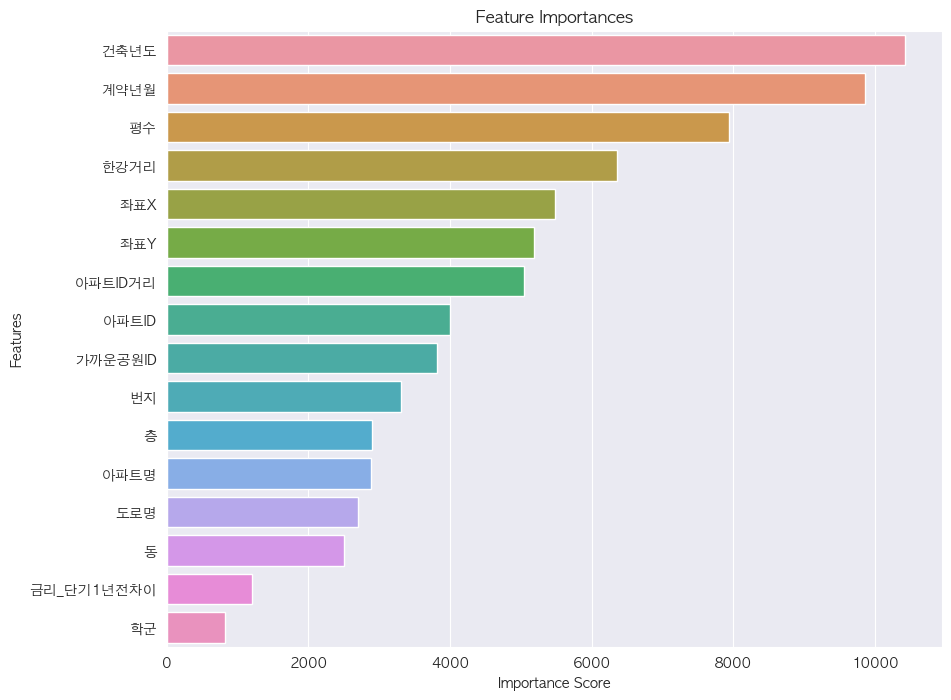

In [60]:
# Feature Importances 추출 및 정렬
importances = pd.Series(model.feature_importances_, index=list(X_train.columns))
importances = importances.sort_values(ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
sns.barplot(x=importances, y=importances.index)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

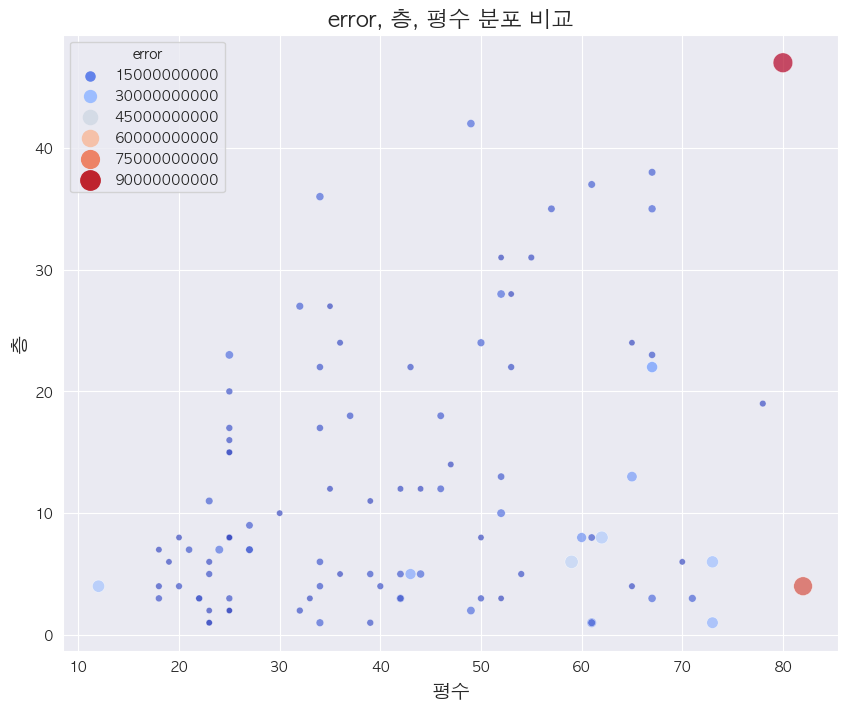

In [61]:
# 2D 히트맵으로 target, 층, 전용면적의 분포 비교
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=error_top100, 
    x='평수', 
    y='층', 
    size='error', 
    hue='error', 
    palette='coolwarm', 
    alpha=0.7, 
    sizes=(20, 200)
)
plt.title('error, 층, 평수 분포 비교', fontsize=16)
plt.xlabel('평수', fontsize=14)
plt.ylabel('층', fontsize=14)
plt.legend(title='error')
plt.grid(True)
plt.show()

In [62]:
print(error_top100['층'].value_counts().sort_values(ascending=False))
print(error_top100['평수'].value_counts())

층
3     11
8      8
1      7
5      7
4      7
6      6
22     5
7      5
2      5
12     4
24     3
18     2
13     2
10     2
23     2
17     2
15     2
28     2
27     2
11     2
31     2
35     2
19     1
16     1
20     1
47     1
9      1
37     1
38     1
36     1
42     1
14     1
Name: count, dtype: int64
평수
25    12
23     6
67     6
34     6
52     5
61     4
42     4
50     3
18     3
39     3
27     3
65     3
43     2
22     2
20     2
46     2
32     2
36     2
44     2
49     2
35     2
73     2
53     2
19     1
54     1
55     1
70     1
78     1
40     1
33     1
47     1
80     1
21     1
37     1
57     1
82     1
71     1
24     1
60     1
12     1
62     1
59     1
30     1
Name: count, dtype: int64


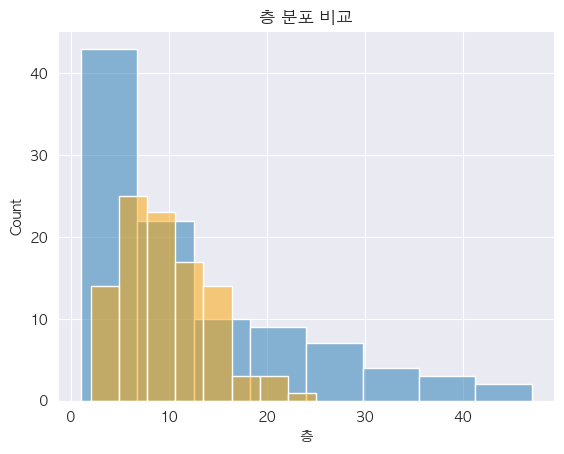

In [63]:
sns.histplot(data = error_top100, x='층', alpha=0.5)
sns.histplot(data = best_top100, x='층', color='orange', alpha=0.5)
plt.title('층 분포 비교')
plt.show()

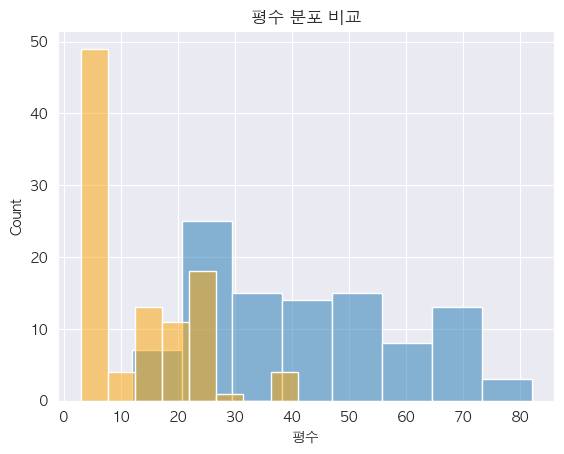

In [64]:
sns.histplot(data = error_top100, x='평수', alpha=0.5)
sns.histplot(data = best_top100, x='평수', color='orange', alpha=0.5)
plt.title('평수 분포 비교')
plt.show()

In [65]:
error_top100

,번지,아파트명,계약년월,층,건축년도,도로명,좌표X,좌표Y,금리_단기1년전차이,평수,동,아파트ID,아파트ID거리,가까운공원ID,한강거리,학군,target,pred,예측차이,error
4881,685-700,아크로서울포레스트,202209,47,2020,왕십리로 83-21,127.043847,37.544464,1.75,80,성수동1가,A10024503,33.425547,P00357,1034.605382,0,1300000.0,995620.908586,304379.091414,9.264663e+10
2201,1496-24,트라움하우스3,202212,4,2002,명달로 97-14,127.002921,37.486202,2.25,82,서초동,A13784102,391.153802,P02373,2477.029577,1,640000.0,350684.592215,289315.407785,8.370341e+10
3679,369-1,현대1차,202207,6,1976,압구정로29길 71,127.027926,37.533027,1.25,59,압구정동,A13589802,23.804947,P02575,215.420231,1,800000.0,601897.181858,198102.818142,3.924473e+10
3272,829,나인원한남,202211,8,2019,한남대로 91,127.003365,37.536254,2.25,62,한남동,A10025192,21.526349,P00235,1300.651674,0,945000.0,756692.730859,188307.269141,3.545963e+10
54,189,개포주공4단지,202301,4,1982,삼성로 14,127.069985,37.485699,2.25,12,개포동,A10023348,172.878586,P02509,3260.120802,1,370000.0,190243.582123,179756.417877,3.231237e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,467-6,대림아크로빌,202301,3,1999,언주로30길 13,127.051078,37.488121,2.50,52,도곡동,A13527014,0.836438,P02530,3444.041702,1,250000.0,311439.059899,-61439.059899,3.774758e+09
219,902,강남센트럴아이파크,202210,8,2022,테헤란로44길 26,127.045688,37.500491,1.75,25,역삼동,A10023825,14.209567,P02640,2670.553133,1,300000.0,238682.757423,61317.242577,3.759804e+09
313,688,래미안힐스테이트고덕,202301,2,2016,아리수로50길 50,127.147083,37.558949,2.25,25,고덕동,A13480403,152.200983,P02913,1246.123873,0,86000.0,147013.546807,-61013.546807,3.722653e+09
108,467-6,대림아크로빌,202212,31,1999,언주로30길 13,127.051078,37.488121,2.25,52,도곡동,A13527014,0.836438,P02530,3444.041702,1,260000.0,320893.219176,-60893.219176,3.707984e+09


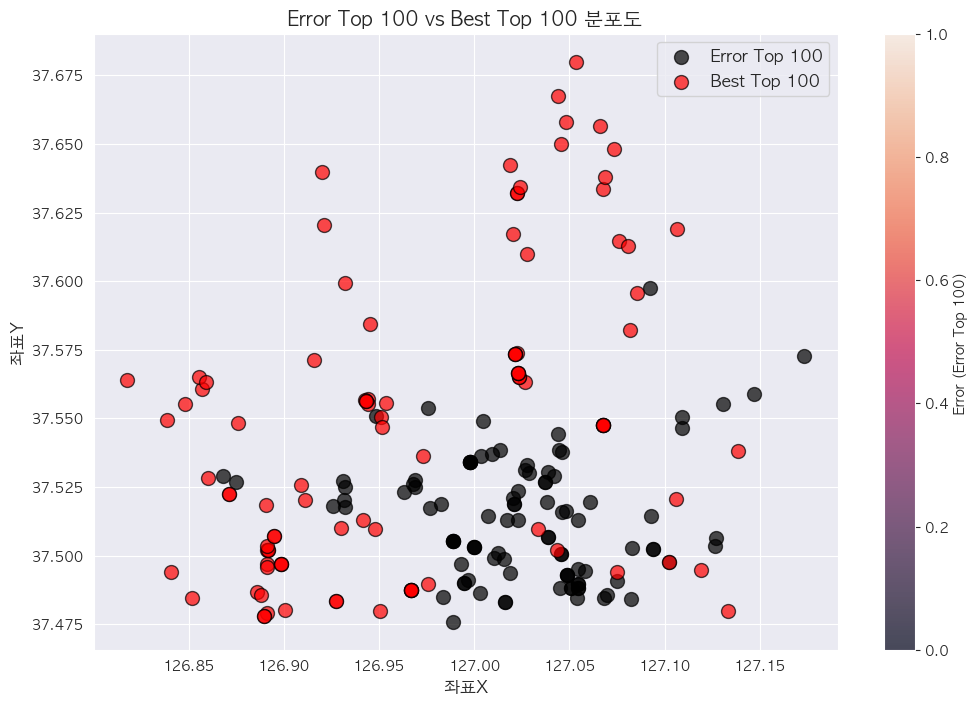

In [66]:

# 그래프 생성
plt.figure(figsize=(12, 8))

# error_top100 산점도
scatter1 = plt.scatter(
    error_top100['좌표X'], error_top100['좌표Y'], 
    c='black',  s=100, edgecolor='k', alpha=0.7, label='Error Top 100'
)

# best_top100 산점도
scatter2 = plt.scatter(
    best_top100['좌표X'], best_top100['좌표Y'], 
    c='red', s=100, edgecolor='k', alpha=0.7, label='Best Top 100'
)

# 컬러바 추가 (error_top100용)
plt.colorbar(scatter1, label='Error (Error Top 100)')

# 축 및 제목 설정
plt.xlabel('좌표X', fontsize=12)
plt.ylabel('좌표Y', fontsize=12)
plt.title('Error Top 100 vs Best Top 100 분포도', fontsize=14)
plt.grid(True)

# 범례 추가
plt.legend(fontsize=12)

# 그래프 표시
plt.show()